In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df= pd.read_csv('../input/arkon-data-bikes-train/train_set.csv')
test_df= pd.read_csv('../input/arkon-data-bikes-test/test_set.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.- Exploratory Data Analysis (Undesrtading the bussines)

In [3]:
train_df.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


In [4]:
train_df.dtypes

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_lat              float64
start_lon              float64
end_lat                float64
end_lon                float64
bike_id                 object
plan_duration          float64
trip_route_category     object
passholder_type         object
start_station            int64
end_station              int64
dtype: object

In [5]:
len(train_df)

700000

In [6]:
len(test_df)

569886

### trip_id

In [7]:
len(train_df['trip_id'].unique())

700000

In [8]:
len(test_df['trip_id'].unique())

569886

### bike_id

In [9]:
len(train_df['bike_id'].unique())

7563

In [10]:
len(test_df['bike_id'].unique())

6893

### Demanda de estaciones en funcion del horario

In [11]:
temp_df = test_df['trip_route_category'].value_counts()/int(test_df['trip_route_category'].value_counts().to_frame().sum())*100
temp_df = temp_df.to_frame()
temp_df.reset_index(inplace=True)
temp_df.columns = ['trip_route_category', 'Percentage_%']
temp_df
#temp_df.reset_index(inplace=True)

,trip_route_category,Percentage_%
0,One Way,83.114342
1,Round Trip,16.885658


## Distribuciones BOXPLOT O VIOLIN PLOT en función de la duración ['duration'] del viaje

### Por 'trip_route_category'

<AxesSubplot:xlabel='trip_route_category', ylabel='duration'>

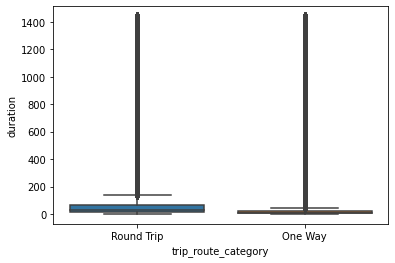

In [12]:
#sns.set_style("whitegrid")
sns.boxplot(x = 'trip_route_category', y = 'duration', data = train_df)

<AxesSubplot:xlabel='trip_route_category', ylabel='duration'>

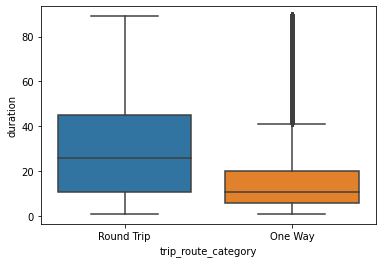

In [13]:
sns.boxplot(x = 'trip_route_category', y = train_df[train_df["duration"]<90]["duration"] , data = train_df)

<AxesSubplot:xlabel='trip_route_category', ylabel='duration'>

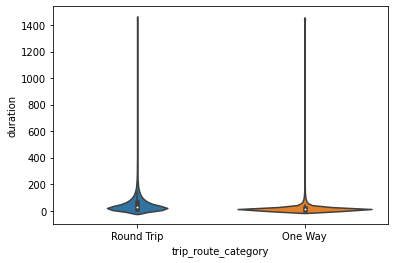

In [14]:
sns.violinplot(x = 'trip_route_category', y = 'duration', data = train_df)

<AxesSubplot:xlabel='trip_route_category', ylabel='duration'>

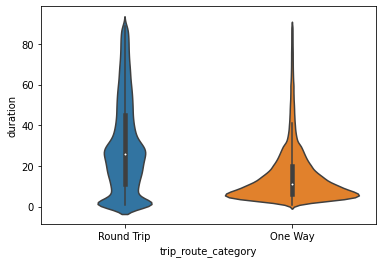

In [15]:
sns.violinplot(x = 'trip_route_category', y = train_df[train_df["duration"]<90]["duration"] , data = train_df)

### Por 'passholder_type'

<AxesSubplot:xlabel='passholder_type', ylabel='duration'>

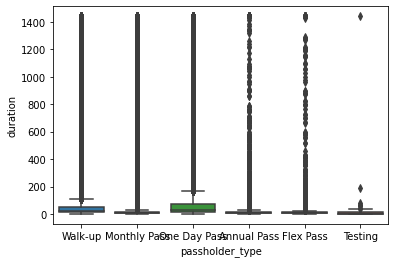

In [16]:
sns.boxplot(x = 'passholder_type', y = 'duration', data = train_df)

<AxesSubplot:xlabel='passholder_type', ylabel='duration'>

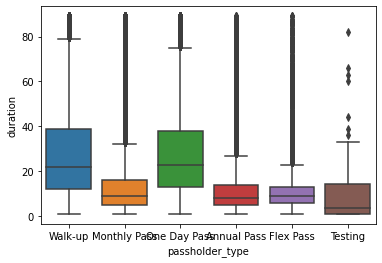

In [17]:
sns.boxplot(x = 'passholder_type', y = train_df[train_df["duration"]<90]["duration"] , data = train_df)

<AxesSubplot:xlabel='passholder_type', ylabel='duration'>

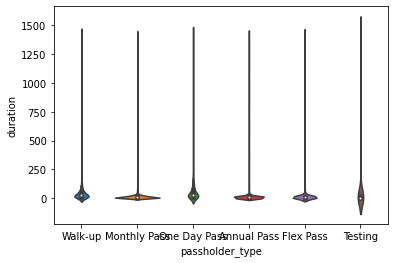

In [18]:
sns.violinplot(x = 'passholder_type', y = "duration", data = train_df)

<AxesSubplot:xlabel='passholder_type', ylabel='duration'>

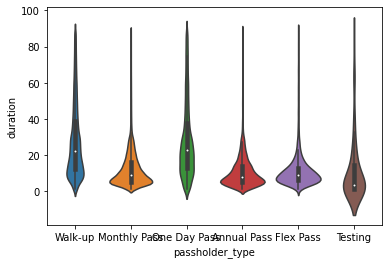

In [19]:
sns.violinplot(x = 'passholder_type', y = train_df[train_df["duration"]<90]["duration"] , data = train_df)

## Estaciones

### start_station

<AxesSubplot:xlabel='start_station', ylabel='Count_trips'>

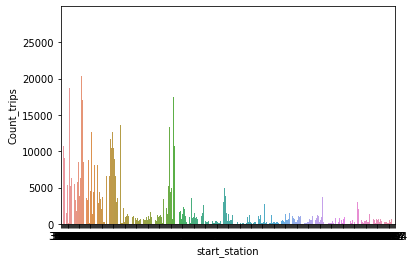

In [20]:
temp_df0 = train_df[['start_station', 'trip_id']].groupby('start_station').count()
temp_df0.reset_index(inplace=True)
temp_df0.columns = ['start_station', 'Count_trips']
sns.barplot(x = 'start_station', y = "Count_trips" , data = temp_df0)

### end_station

<AxesSubplot:xlabel='end_station', ylabel='Count_trips'>

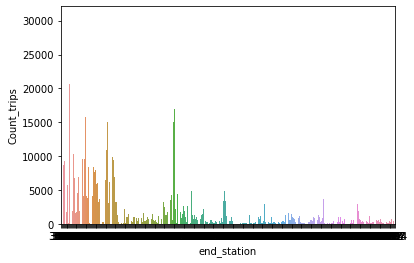

In [21]:
temp_df1 = train_df[['end_station', 'trip_id']].groupby('end_station').count()
temp_df1.reset_index(inplace=True)
temp_df1.columns = ['end_station', 'Count_trips']
sns.barplot(x = 'end_station', y = "Count_trips" , data = temp_df1, label = 'end_station')

In [22]:
temp_df1.columns

Index(['end_station', 'Count_trips'], dtype='object')

In [23]:
temp_df0.columns = ['station', 'Count_start']
temp_df1.columns = ['station', 'Count_end']

In [24]:
temp = pd.merge(temp_df0, temp_df1, on = "station")
temp['(Count_end - Count_start)'] = temp['Count_end'] - temp['Count_start']

In [25]:
temp.head()

,station,Count_start,Count_end,(Count_end - Count_start)
0,3000,1138,12347,11209
1,3005,28490,30576,2086
2,3006,12645,12807,162
3,3007,10774,8681,-2093
4,3008,9051,9341,290


In [26]:
total_stations = len(temp)
print(total_stations)

364


In [27]:
print('MAS_SALIDAS_QUE_LLEGADAS:', len(temp.where(temp['(Count_end - Count_start)'] < 0).dropna()))
print('MAS_SALIDAS_QUE_LLEGADAS [%]:', "{:.2f}".format(len(temp.where(temp['(Count_end - Count_start)'] < 0).dropna())/total_stations*100))

MAS_SALIDAS_QUE_LLEGADAS: 209
MAS_SALIDAS_QUE_LLEGADAS [%]: 57.42


In [28]:
print('BIEN', len(temp.where(temp['(Count_end - Count_start)'] >= 0).dropna()))
print('BIEN [%]:', "{:.2f}".format(len(temp.where(temp['(Count_end - Count_start)'] >= 0).dropna())/total_stations*100))

BIEN 155
BIEN [%]: 42.58


<AxesSubplot:xlabel='station', ylabel='(Count_end - Count_start)'>

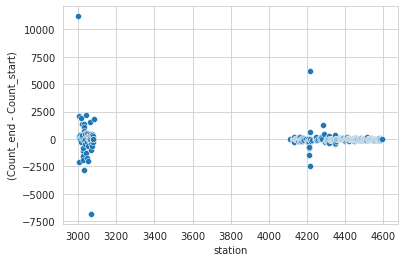

In [29]:
sns.set_style("whitegrid")
sns.scatterplot(x = 'station', y = '(Count_end - Count_start)', data = temp)

## Suscripciones

Text(0.5, 1.0, '')

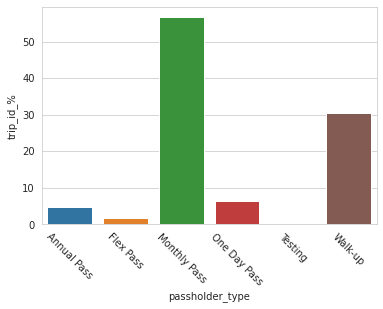

In [30]:
temp_df = train_df[['passholder_type', 'trip_id']].groupby('passholder_type').count()
temp_df.reset_index(inplace=True)
temp_df.rename(columns = {'trip_id':'trip_id_count'}, inplace = True)
temp_df.insert(loc = 2, column = 'trip_id_%', value = 100*temp_df[['trip_id_count']]/temp_df['trip_id_count'].sum())
temp_df.head()
sns.barplot(x = 'passholder_type', y = "trip_id_%" , data = temp_df)
plt.title('Viajes por suscripción [%]')
plt.xticks(rotation=-45)
plt.title("")

In [31]:
temp_df

,passholder_type,trip_id_count,trip_id_%
0,Annual Pass,34092,4.888275
1,Flex Pass,11604,1.663837
2,Monthly Pass,394769,56.603874
3,One Day Pass,44455,6.374171
4,Testing,78,0.011184
5,Walk-up,212426,30.458659


## Visualizando los viajes en función del tipo de suscripción ("passholder_type") y tipo de viaje ("trip_toute_category")

### start_station

In [32]:
start_station_df = train_df[['start_station', 'trip_id']].groupby('start_station').count()
start_station_df.reset_index(inplace=True)
start_station_df.rename(columns = {'trip_id':'trip_id_count'}, inplace = True)
start_station_df.insert(loc = 2, column = 'trip_id_%', value = start_station_df[['trip_id_count']]/start_station_df['trip_id_count'].sum())
print('Total "start_station": '+str(len(start_station_df['start_station'])))
print()
start_station_df.head()

Total "start_station": 364



,start_station,trip_id_count,trip_id_%
0,3000,1138,0.001626
1,3005,28490,0.040700
2,3006,12645,0.018064
3,3007,10774,0.015391
4,3008,9051,0.012930


In [33]:
start_station_df.where(start_station_df['trip_id_%'] > 0.01).dropna()['trip_id_%'].sum()

0.5196314285714286

In [34]:
start_station_df.where(start_station_df['trip_id_%'] > 0.01).dropna()['trip_id_%'].count()

30

In [35]:
start_station_df.where(start_station_df['trip_id_%'] > 0.01).dropna()['trip_id_%'].count()/len(start_station_df)

0.08241758241758242

30 estaciones (~8.24%) son el ORIGEN de ~52% de los viajes. 

In [36]:
# Obtenemos las estaciones de este conjunto start_station_df['trip_id_%'] > 0.01
start_station_list1 = start_station_df.where(start_station_df['trip_id_%'] > 0.01).dropna()['start_station'].values
temp_df0 = train_df[train_df['start_station'].isin(start_station_list1)][['trip_route_category', 'passholder_type']].dropna().groupby(['passholder_type', 'trip_route_category']).size().to_frame()
temp_df0.reset_index(inplace=True)
temp_df0.rename(columns = { 0:'Count'}, inplace = True)
temp_df0.insert(loc = 3, column = 'Percentage_%', value = temp_df0[['Count']]/temp_df0['Count'].sum()*100)
#temp_df0
#ax = sns.barplot(x="passholder_type", y="Count", hue="trip_route_category", data=temp_df0)


In [37]:
# Obtenemos las estaciones de este conjunto start_station_df['trip_id_%'] <= 0.01
start_station_list1 = start_station_df.where(start_station_df['trip_id_%'] <= 0.01).dropna()['start_station'].values
temp_df1 = train_df[train_df['start_station'].isin(start_station_list1)][['trip_route_category', 'passholder_type']].dropna().groupby(['passholder_type', 'trip_route_category']).size().to_frame()
temp_df1.reset_index(inplace=True)
temp_df1.rename(columns = { 0:'Count'}, inplace = True)
temp_df1.insert(loc = 3, column = 'Percentage_%', value = temp_df1[['Count']]/temp_df1['Count'].sum()*100)
#temp_df1
#ax = sns.barplot(x="passholder_type", y="Count", hue="trip_route_category", data=temp_df1)

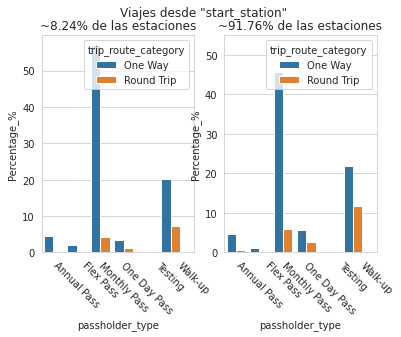

In [38]:
figure, axis = plt.subplots(1, 2)
figure.suptitle('Viajes desde "start_station"')
sns.barplot(ax = axis[0], x="passholder_type", y="Percentage_%", hue="trip_route_category", data=temp_df0)
axis[0].set_title("~8.24% de las estaciones")
axis[0].set_xticks(ticks = range(1, len(temp_df0['passholder_type'].unique()) + 1), labels = temp_df0['passholder_type'].unique(), rotation=-45)
sns.barplot(ax = axis[1], x="passholder_type", y="Percentage_%", hue="trip_route_category", data=temp_df1)
axis[1].set_title("~91.76% de las estaciones")
axis[1].set_xticks(ticks = range(1, len(temp_df0['passholder_type'].unique()) + 1), labels = temp_df0['passholder_type'].unique(), rotation=-45)
plt.ylim([0, 55])
plt.savefig('imagen_1.jpg')

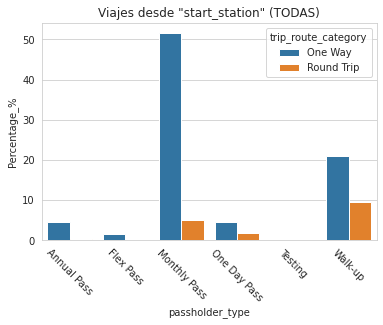

In [39]:
temp_df = train_df[['trip_route_category', 'passholder_type']].groupby(['passholder_type', 'trip_route_category']).size().to_frame()
temp_df.reset_index(inplace=True)
temp_df.rename(columns = { 0:'Count'}, inplace = True)
temp_df.insert(loc = 3, column = 'Percentage_%', value = temp_df[['Count']]/temp_df['Count'].sum()*100)
ax = sns.barplot(x="passholder_type", y="Percentage_%", hue="trip_route_category", data=temp_df)
plt.title('Viajes desde "start_station" (TODAS)')
plt.xticks(rotation=-45)
plt.savefig('imagen_2.jpg')

### end_station

In [40]:
end_station_df = train_df[['end_station', 'trip_id']].groupby('end_station').count()
end_station_df.reset_index(inplace=True)
end_station_df.rename(columns = {'trip_id':'trip_id_count'}, inplace = True)
end_station_df.insert(loc = 2, column = 'trip_id_%', value = end_station_df[['trip_id_count']]/end_station_df['trip_id_count'].sum())
print('Total "end_station": '+str(len(end_station_df['end_station'])))
print()
end_station_df.head()

Total "end_station": 369



,end_station,trip_id_count,trip_id_%
0,3000,12347,0.017639
1,3005,30576,0.043680
2,3006,12807,0.018296
3,3007,8681,0.012401
4,3008,9341,0.013344


In [41]:
end_station_df.where(end_station_df['trip_id_%'] > 0.01).dropna()['trip_id_%'].sum()

0.5121228571428572

In [42]:
end_station_df.where(end_station_df['trip_id_%'] > 0.01).dropna()['trip_id_%'].count()

28

In [43]:
end_station_df.where(end_station_df['trip_id_%'] > 0.01).dropna()['trip_id_%'].count()/len(end_station_df)

0.07588075880758807

Los valores son "razonablemente" similares con el conjunto previo.

In [44]:
# Obtenemos las estaciones de este conjunto start_station_df['trip_id_%'] > 0.01
end_station_list1 = end_station_df.where(end_station_df['trip_id_%'] > 0.01).dropna()['end_station'].values
temp_df0 = train_df[train_df['end_station'].isin(end_station_list1)][['trip_route_category', 'passholder_type']].dropna().groupby(['passholder_type', 'trip_route_category']).size().to_frame()
temp_df0.reset_index(inplace=True)
temp_df0.rename(columns = { 0:'Count'}, inplace = True)
temp_df0.insert(loc = 3, column = 'Percentage_%', value = temp_df0[['Count']]/temp_df0['Count'].sum()*100)
#ax = sns.barplot(x="passholder_type", y="Count", hue="trip_route_category", data=temp_df0)

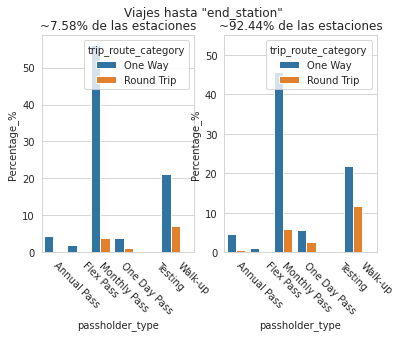

In [45]:
figure, axis = plt.subplots(1, 2)
figure.suptitle('Viajes hasta "end_station"')
sns.barplot(ax = axis[0], x="passholder_type", y="Percentage_%", hue="trip_route_category", data=temp_df0)
axis[0].set_title("~7.58% de las estaciones")
axis[0].set_xticks(ticks = range(1, len(temp_df0['passholder_type'].unique()) + 1), labels = temp_df0['passholder_type'].unique(), rotation=-45)
sns.barplot(ax = axis[1], x="passholder_type", y="Percentage_%", hue="trip_route_category", data=temp_df1)
axis[1].set_title("~92.44% de las estaciones")
axis[1].set_xticks(ticks = range(1, len(temp_df0['passholder_type'].unique()) + 1), labels = temp_df0['passholder_type'].unique(), rotation=-45)
plt.ylim([0, 55])
plt.savefig('imagen_3.jpg')

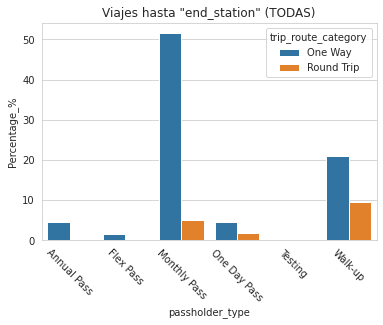

In [46]:
temp_df = train_df[['trip_route_category', 'passholder_type']].groupby(['passholder_type', 'trip_route_category']).size().to_frame()
temp_df.reset_index(inplace=True)
temp_df.rename(columns = { 0:'Count'}, inplace = True)
temp_df.insert(loc = 3, column = 'Percentage_%', value = temp_df[['Count']]/temp_df['Count'].sum()*100)
ax = sns.barplot(x="passholder_type", y="Percentage_%", hue="trip_route_category", data=temp_df)
plt.title('Viajes hasta "end_station" (TODAS)')
plt.xticks(rotation=-45)
plt.savefig('imagen_4.jpg')

### Data Wrangling (data time)

In [47]:
train_df['start_time']

0         2018-08-07 11:20:00
1             9/17/2017 17:51
2         2019-04-22 09:22:00
3             9/22/2019 11:27
4             1/31/2020 17:11
                 ...         
699995    2018-04-25 18:32:00
699996    2019-11-12 16:49:10
699997    2018-01-13 15:49:00
699998    2019-02-04 14:16:00
699999         8/1/2021 20:26
Name: start_time, Length: 700000, dtype: object

In [48]:
train_df['start_time'].isnull().sum()

0

In [49]:
train_df['end_time'].isnull().sum()

0

In [50]:
#Para el test_df
print(test_df['start_time'].isnull().sum())
print(test_df['end_time'].isnull().sum())

0
0


Convertimos el tipo de datos string (object) a tipo datetime en ambos conjuntos de datos (train_set y test_set) para las columnas start_time and end_time

In [51]:
columns = ['start_time', 'end_time']
for column in columns:
    train_df[column] = pd.to_datetime(train_df[column])
    test_df[column] = pd.to_datetime(test_df[column])

In [52]:
train_df['start_time']

0        2018-08-07 11:20:00
1        2017-09-17 17:51:00
2        2019-04-22 09:22:00
3        2019-09-22 11:27:00
4        2020-01-31 17:11:00
                 ...        
699995   2018-04-25 18:32:00
699996   2019-11-12 16:49:10
699997   2018-01-13 15:49:00
699998   2019-02-04 14:16:00
699999   2021-08-01 20:26:00
Name: start_time, Length: 700000, dtype: datetime64[ns]

In [53]:
time_dict = {}
time_list = [('hours_', 'hour'), ('minutes_', 'minute'), ('seconds_', 'second'), ('weekDay_', 'day_of_week'), ('month_', 'month'), ('year_', 'year'), ('date_', 'date()')]
for item in ['start', 'end']:
    for row in train_df[item + '_time']:
        for item1, item2 in time_list:
            if item1 + item in time_dict.keys():
                eval("time_dict['" + item1 + item + "'].append(row." + item2 + ")")
            else:
                time_dict[item1 + item] = []
                eval("time_dict['" + item1 + item + "'].append(row." + item2 + ")")
for key, value in time_dict.items():
    train_df.insert(loc = len(train_df.columns), column = key, value = value)
    print('Exit! Inserted ' + key + ' column')

Exit! Inserted hours_start column
Exit! Inserted minutes_start column
Exit! Inserted seconds_start column
Exit! Inserted weekDay_start column
Exit! Inserted month_start column
Exit! Inserted year_start column
Exit! Inserted date_start column
Exit! Inserted hours_end column
Exit! Inserted minutes_end column
Exit! Inserted seconds_end column
Exit! Inserted weekDay_end column
Exit! Inserted month_end column
Exit! Inserted year_end column
Exit! Inserted date_end column


In [54]:
len(time_dict.keys())

14

In [55]:
train_df['start_time']

0        2018-08-07 11:20:00
1        2017-09-17 17:51:00
2        2019-04-22 09:22:00
3        2019-09-22 11:27:00
4        2020-01-31 17:11:00
                 ...        
699995   2018-04-25 18:32:00
699996   2019-11-12 16:49:10
699997   2018-01-13 15:49:00
699998   2019-02-04 14:16:00
699999   2021-08-01 20:26:00
Name: start_time, Length: 700000, dtype: datetime64[ns]

In [56]:
train_df.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,...,month_start,year_start,date_start,hours_end,minutes_end,seconds_end,weekDay_end,month_end,year_end,date_end
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,...,8,2018,2018-08-07,11,55,0,1,8,2018,2018-08-07
1,46560345,32,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,...,9,2017,2017-09-17,18,23,0,6,9,2017,2017-09-17
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,...,4,2019,2019-04-22,9,28,0,0,4,2019,2019-04-22
3,129547190,138,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,...,9,2019,2019-09-22,13,45,0,6,9,2019,2019-09-22
4,136619463,14,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,...,1,2020,2020-01-31,17,25,0,4,1,2020,2020-01-31


## Viajes por hora del día

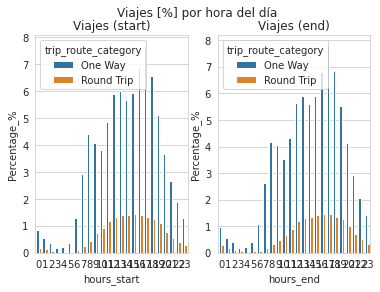

In [57]:
temp_df = {'_start':'', '_end':''}
for item in temp_df.keys():
    temp_df[item] = train_df[['trip_route_category', 'hours' + item]].groupby(['hours' + item, 'trip_route_category']).size().to_frame()
    temp_df[item].reset_index(inplace=True)
    temp_df[item].rename(columns = { 0:'Count'}, inplace = True)
    temp_df[item].insert(loc = 3, column = 'Percentage_%', value = temp_df[item][['Count']]/temp_df[item]['Count'].sum()*100)

hour_list = train_df['hours_start'].unique().tolist()
hour_list.sort()
figure, axis = plt.subplots(1, 2)
figure.suptitle('Viajes [%] por hora del día')
sns.barplot(ax = axis[0], x="hours_start", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_start'])
axis[0].set_title("Viajes (start)")
axis[0].set_xticks(ticks = range(0, len(temp_df['_start']['hours_start'].unique())), labels = hour_list)#, rotation=-75)
#axis[0].set_ylim(0, 16)
sns.barplot(ax = axis[1], x="hours_end", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_end'])
axis[1].set_title("Viajes (end)")
axis[1].set_xticks(ticks = range(0, len(temp_df['_end']['hours_end'].unique())), labels = hour_list)#, rotation=-75)
#axis[1].set_ylim(0, 16)
#plt.ylim([0, 16])

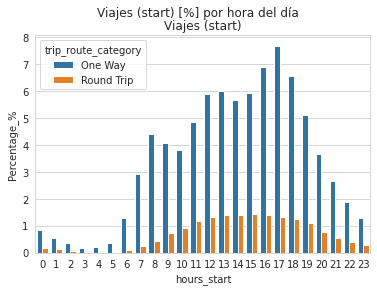

In [58]:
figure, axis = plt.subplots()
figure.suptitle('Viajes (start) [%] por hora del día')
sns.barplot(ax = axis, x="hours_start", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_start'])
axis.set_title("Viajes (start)")
axis.set_xticks(ticks = range(0, len(temp_df['_start']['hours_start'].unique())), labels = hour_list)#, rotation=-75)

## Viajes por días de la semana

In [59]:
train_df['weekDay_start'].unique()

array([1, 6, 0, 4, 5, 3, 2])

(0.0, 16.0)

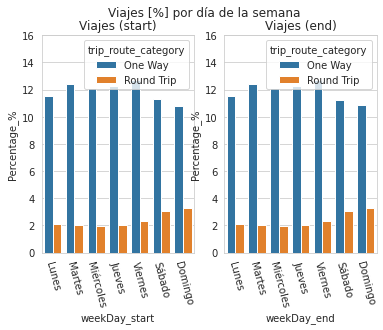

In [60]:
temp_df = {'_start':'', '_end':''}
for item in temp_df.keys():
    temp_df[item] = train_df[['trip_route_category', 'weekDay' + item]].groupby(['weekDay' + item, 'trip_route_category']).size().to_frame()
    temp_df[item].reset_index(inplace=True)
    temp_df[item].rename(columns = { 0:'Count'}, inplace = True)
    temp_df[item].insert(loc = 3, column = 'Percentage_%', value = temp_df[item][['Count']]/temp_df[item]['Count'].sum()*100)

week_list = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
figure, axis = plt.subplots(1, 2)
figure.suptitle('Viajes [%] por día de la semana')
sns.barplot(ax = axis[0], x="weekDay_start", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_start'])
axis[0].set_title("Viajes (start)")
axis[0].set_xticks(ticks = range(0, len(temp_df['_start']['weekDay_start'].unique())), labels = week_list, rotation=-75)
axis[0].set_ylim(0, 16)
sns.barplot(ax = axis[1], x="weekDay_end", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_end'])
axis[1].set_title("Viajes (end)")
axis[1].set_xticks(ticks = range(0, len(temp_df['_end']['weekDay_end'].unique())), labels = week_list, rotation=-75)
axis[1].set_ylim(0, 16)
#plt.ylim([0, 16])

## Viajes por mes

In [61]:
train_df['month_start'].unique()

array([ 8,  9,  4,  1, 12, 10, 11,  2,  5,  3,  7,  6])

(0.0, 12.0)

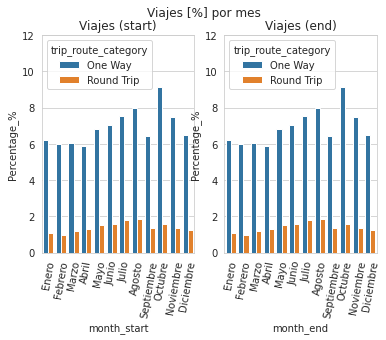

In [62]:
temp_df = {'_start':'', '_end':''}
for item in temp_df.keys():
    temp_df[item] = train_df[['trip_route_category', 'month' + item]].groupby(['month' + item, 'trip_route_category']).size().to_frame()
    temp_df[item].reset_index(inplace=True)
    temp_df[item].rename(columns = { 0:'Count'}, inplace = True)
    temp_df[item].insert(loc = 3, column = 'Percentage_%', value = temp_df[item][['Count']]/temp_df[item]['Count'].sum()*100)

month_list = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre' , 'Octubre', 'Noviembre', 'Diciembre']
figure, axis = plt.subplots(1, 2)
figure.suptitle('Viajes [%] por mes')
sns.barplot(ax = axis[0], x="month_start", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_start'])
axis[0].set_title("Viajes (start)")
axis[0].set_xticks(ticks = range(0, len(temp_df['_start']['month_start'].unique())), labels = month_list, rotation=80)
axis[0].set_ylim(0, 12)
sns.barplot(ax = axis[1], x="month_end", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_end'])
axis[1].set_title("Viajes (end)")
axis[1].set_xticks(ticks = range(0, len(temp_df['_end']['month_end'].unique())), labels = month_list, rotation=80)
axis[1].set_ylim(0, 12)
#plt.ylim([month

## Viajes por año

In [63]:
train_df['year_start'].unique()

array([2018, 2017, 2019, 2020, 2021, 2016])

In [64]:
train_df['year_end'].unique()

array([2018, 2017, 2019, 2020, 2021, 2016, 2022])

VIAJE EN ANHO NUEVO!

(0.0, 30.0)

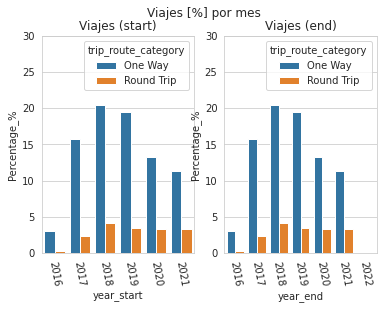

In [65]:
temp_df = {'_start':'', '_end':''}
for item in temp_df.keys():
    temp_df[item] = train_df[['trip_route_category', 'year' + item]].groupby(['year' + item, 'trip_route_category']).size().to_frame()
    temp_df[item].reset_index(inplace=True)
    temp_df[item].rename(columns = { 0:'Count'}, inplace = True)
    temp_df[item].insert(loc = 3, column = 'Percentage_%', value = temp_df[item][['Count']]/temp_df[item]['Count'].sum()*100)

year_list = ['2016', '2017', '2018', '2019', '2020', '2021']
year_list2 = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
figure, axis = plt.subplots(1, 2)
figure.suptitle('Viajes [%] por mes')
sns.barplot(ax = axis[0], x="year_start", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_start'])
axis[0].set_title("Viajes (start)")
axis[0].set_xticks(ticks = range(0, len(temp_df['_start']['year_start'].unique())), labels = year_list, rotation=-80)
axis[0].set_ylim(0, 30)
sns.barplot(ax = axis[1], x="year_end", y="Percentage_%", hue = 'trip_route_category', data=temp_df['_end'])
axis[1].set_title("Viajes (end)")
axis[1].set_xticks(ticks = range(0, len(temp_df['_end']['year_end'].unique())), labels = year_list2, rotation=-80)
axis[1].set_ylim(0, 30)
#plt.ylim([month

## Viajes en función de la fecha

### Por categoría de viaje 'trip_route_category'

In [66]:
temp_df = {'_start':'', '_end':''}
for item in temp_df.keys():
    temp_df[item] = train_df[['trip_route_category', 'date' + item]].groupby(['date' + item, 'trip_route_category']).size().to_frame()
    temp_df[item].reset_index(inplace=True)
    temp_df[item].rename(columns = { 0:'Count'}, inplace = True)
    temp_df[item].insert(loc = 3, column = 'Percentage_%', value = temp_df[item][['Count']]/temp_df[item]['Count'].sum()*100)
    #Promedio movil 7 días
    #temp_df[item].insert(loc = len(temp_df[item].columns), column = '7day_rolling_avg', value = temp_df[item][['Count']].rolling( 7).mean())


(0.0, 1000.0)

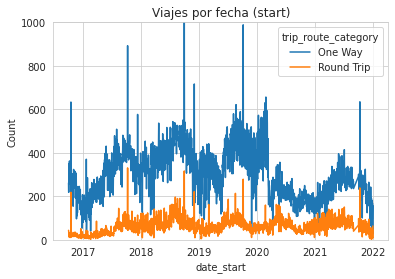

In [67]:
#sns.set_style("whitegrid")
sns.lineplot(x="date_start", y="Count", hue = 'trip_route_category', data=temp_df['_start'])
plt.title("Viajes por fecha (start)")
plt.ylim([0, 1000])

### One Way (only '_start')

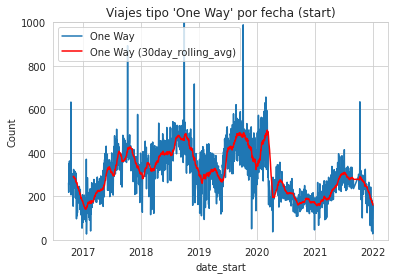

In [68]:
temp_df2 = temp_df['_start'].where(temp_df['_start']['trip_route_category'] == "One Way").dropna()[['date_start', 'trip_route_category', 'Count']]
temp_df2['30day_rolling_avg'] = temp_df2['Count'].rolling( 30).mean()
#sns.set_style("whitegrid")
sns.lineplot(x="date_start", y="Count", data=temp_df['_start'].where(temp_df['_start']['trip_route_category'] == "One Way"), label='One Way')#, color='b')
sns.lineplot(x="date_start", y="30day_rolling_avg", data=temp_df2, color='r', label='One Way (30day_rolling_avg)')
plt.title("Viajes tipo 'One Way' por fecha (start)")
plt.ylim([0, 1000])
plt.legend(loc = "upper left")
plt.show()

### Round Trip (only '_start')

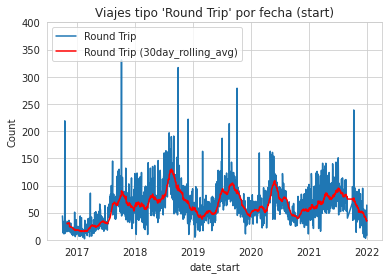

In [69]:
temp_df2 = temp_df['_start'].where(temp_df['_start']['trip_route_category'] == "Round Trip").dropna()[['date_start', 'trip_route_category', 'Count']]
temp_df2['30day_rolling_avg'] = temp_df2['Count'].rolling( 30).mean()
#sns.set_style("whitegrid")
sns.lineplot(x="date_start", y="Count", data=temp_df['_start'].where(temp_df['_start']['trip_route_category'] == "Round Trip"), label='Round Trip')#, color='b')
sns.lineplot(x="date_start", y="30day_rolling_avg", data=temp_df2, color='r', label='Round Trip (30day_rolling_avg)')
plt.title("Viajes tipo 'Round Trip' por fecha (start)")
plt.ylim([0, 400])
plt.legend(loc = "upper left")
plt.show()

## Por tipo de suscripción 'passholder_type' y por categoría de viaje 'trip_route_category' (only with 'start_station' trips)

In [70]:
temp_df = train_df[['passholder_type', 'trip_route_category', 'date_start']].groupby(['date_start', 'passholder_type', 'trip_route_category']).size().to_frame()
temp_df.reset_index(inplace=True)
temp_df.rename(columns = { 0:'Count'}, inplace = True)
# One Way
temp_df1 = temp_df.where(temp_df['trip_route_category'] == 'One Way').dropna()
#temp_df1.reset_index(inplace = True)
# Round Trip
temp_df2 = temp_df.where(temp_df['trip_route_category'] == 'Round Trip').dropna()
#temp_df2.reset_index(inplace = True)

(0.0, 500.0)

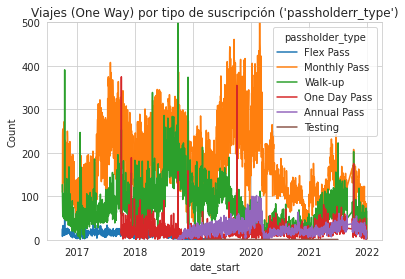

In [71]:
# One Way
#sns.set_style("whitegrid")
sns.lineplot(x="date_start", y="Count", hue = 'passholder_type', data=temp_df1)
plt.title("Viajes (One Way) por tipo de suscripción ('passholderr_type')")
plt.ylim([0, 500])

In [72]:
temp_dict = {}
for passType in temp_df1['passholder_type'].unique().tolist():
    temp_dict[passType] = temp_df1.where(temp_df1['passholder_type'] == passType).dropna()[['date_start', 'Count']]
    value = temp_df1.where(temp_df1['passholder_type'] == passType).dropna()['Count'].rolling( 30).mean()
    temp_dict[passType].insert(loc = len(temp_dict[passType].columns), column = passType + '_30day_rolling_avg', value = value)

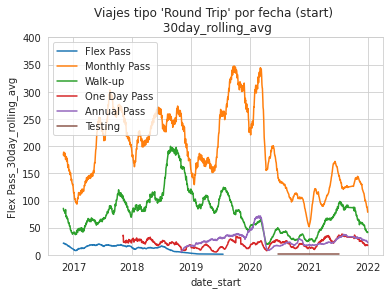

In [73]:
#sns.set_style("whitegrid")
for key in temp_dict.keys():
    sns.lineplot(x = 'date_start', y = key + '_30day_rolling_avg', data = temp_dict[key], label = key)
plt.title("Viajes tipo 'Round Trip' por fecha (start) \n 30day_rolling_avg")
plt.ylim([0, 400])
plt.legend(loc = "upper left")
plt.show()

## Apuntes Finales

La mayoría de los planes son "Montly Pass" (~56.60%) y "Walk-up" (~30.45%), faltó discriminar gráficas por plan por hora.

La mayoría de los viajes son "One Way" (~83.11%)

Las horas de mayor consumo son entre las 15 y 18 horas (One Way), a las 17 horas es el máximo.

Los viajes Round Trip tienen una demanda relatvamente (con relación a la proporción de viajes) constante entre las 12 y las 18 horas.

La proporción de viajes "One Way" va disminuyendo a lo largo de la semana, contrario a los viajes "Round Trip".

Viernes es el día de la semana con mayor demanda.

Existe una tendencia creciente de consumo en verano que alcanza su pico en Agosto donde disminuye abrubtamente y vuelve a aumentar de forma significativa en Octubre donde paulatinamente disminuye hasta finalizar el año.

La premisa:

"Se tiene la intuición que la tendencia en uso de bicicletas compartidas entre estaciones va a la alta, por lo que se requiere realizar una correcta planificación de bicicletas que deben tener. Adicionalmente, se espera que los planes de consumo anual crezcan en mayor
proporción." NO ES REAL a la luz del análisis visual de los datos. La tendencia de biciletas compartidas entre estaciones fue mayor desde el principio que la que no. De hecho, el comportamiento de los viajes a lo largo del tiempo está tendiendo a ir a la baja con ciclos periodicos de crecimiento pero  con picos (no sólo el pico) de consumo cada vez menores.
Los dos principales planes de conusmo tienen un comportamiento similar en los últimos meses y con tendencia a la baja.

Un enfoque que podría resolver el problema de optmización de biciletas en las diferentes estaciones con el objetivo de evitar que no se queden sin ellas se puede consuultar en el siguiente [link](https://www.researchgate.net/publication/329369086_OPTIMIZATION_OF_ATM_AND_BRANCH_CASH_OPERATIONS_USING_AN_INTEGRATED_CASH_REQUIREMENT_FORECASTING_AND_CASH_OPTIMIZATION_MODEL/ "link")